### Iris Dataset Analysis
This notebook performs clustering, regression analysis, and statistical visualizations on the Iris dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

# Load the dataset
data = pd.read_csv("Iris.csv")
data.drop(columns=['Id'], inplace=True)

In [2]:
# Data Overview
def data_overview(df):
    """Display dataset overview and statistics."""
    print("Dataset Overview:\n")
    print(df.head())
    print("\nDataset Description:\n")
    print(df.describe())

data_overview(data)

Dataset Overview:

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Description:

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max     

In [3]:
# Normalize Data
scaler = StandardScaler()
numeric_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
data_scaled = scaler.fit_transform(data[numeric_features])

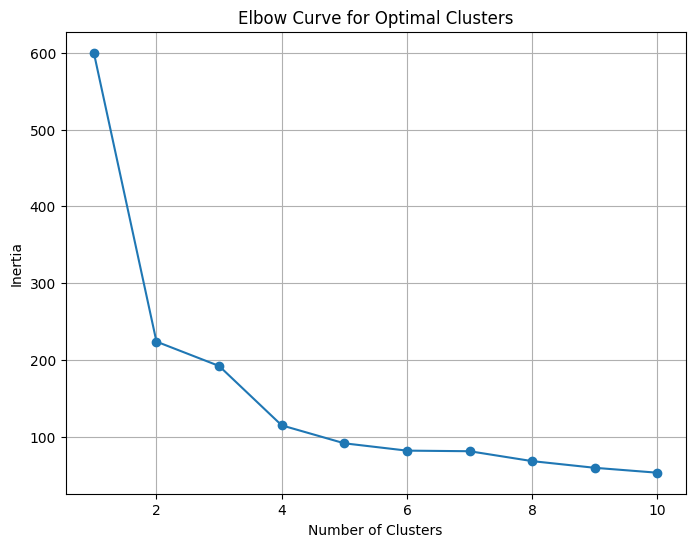

In [4]:
# Elbow Curve for K-Means Clustering
def plot_elbow_curve(data):
    """Plot the elbow curve to determine the optimal number of clusters."""
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve for Optimal Clusters')
    plt.grid()
    plt.show()

plot_elbow_curve(data_scaled)

Silhouette Score for 3 clusters: 0.48


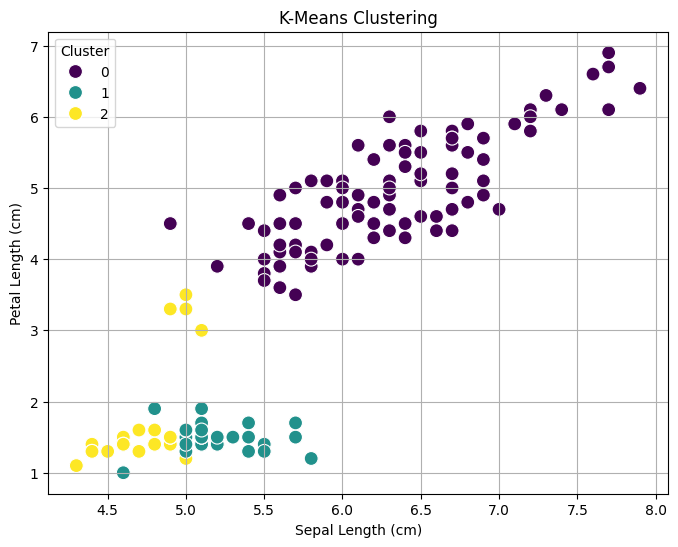

In [5]:
# K-Means Clustering with Visualization
def kmeans_clustering(data, n_clusters=3):
    """Perform K-Means clustering and visualize the clusters."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='SepalLengthCm', y='PetalLengthCm', hue='Cluster', palette='viridis', s=100)
    plt.title('K-Means Clustering')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal Length (cm)')
    plt.legend(title='Cluster')
    plt.grid()
    plt.show()

    return kmeans

kmeans_model = kmeans_clustering(data)

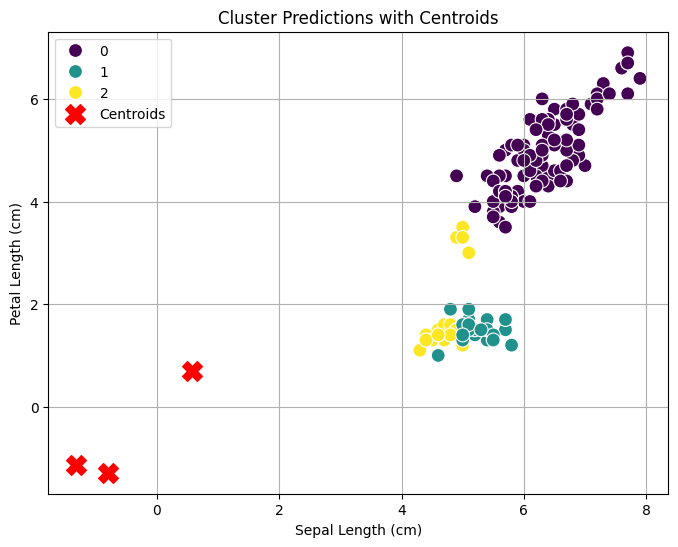

In [6]:
# Clustering Prediction Visualization
def plot_cluster_predictions(data, kmeans_model):
    """Plot cluster predictions for the dataset."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='SepalLengthCm', y='PetalLengthCm', hue='Cluster', palette='viridis', s=100)
    centers = kmeans_model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 2], c='red', s=200, marker='X', label='Centroids')
    plt.title('Cluster Predictions with Centroids')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal Length (cm)')
    plt.legend()
    plt.grid()
    plt.show()

plot_cluster_predictions(data, kmeans_model)

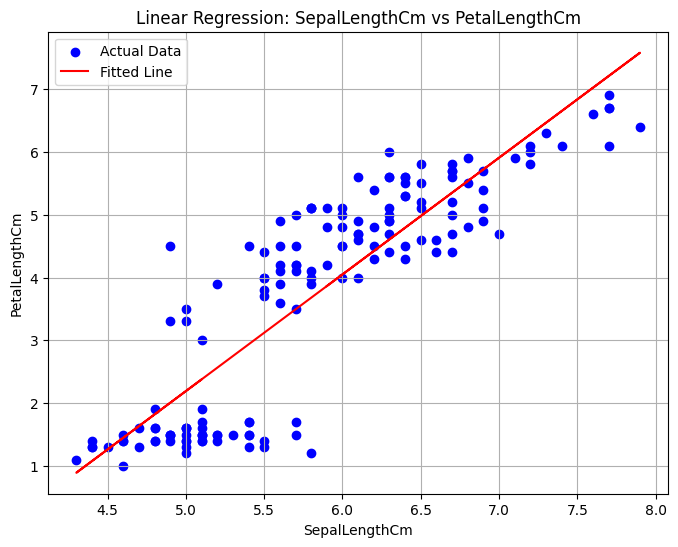

Mean Squared Error: 0.74
R-squared: 0.76


In [7]:
# Linear Regression
def perform_linear_regression(data, x_col, y_col):
    """Perform linear regression and plot the fitted line."""
    X = data[[x_col]].values
    y = data[y_col].values

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    data['Predicted'] = y_pred

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Fitted Line')
    plt.title(f'Linear Regression: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid()
    plt.show()

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

    return model

lin_reg_model = perform_linear_regression(data, 'SepalLengthCm', 'PetalLengthCm')

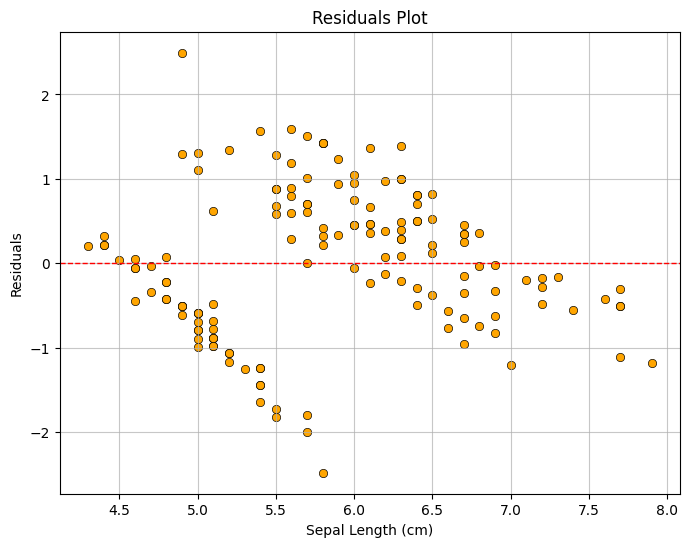

In [8]:
# Residual Analysis for Linear Regression
def plot_residuals(data, y_col):
    """Plot residuals of the linear regression model."""
    residuals = data[y_col] - data['Predicted']
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='SepalLengthCm', y=residuals, color='orange', edgecolor='black')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.title("Residuals Plot")
    plt.xlabel("Sepal Length (cm)")
    plt.ylabel("Residuals")
    plt.grid(alpha=0.7)
    plt.show()

plot_residuals(data, 'PetalLengthCm')

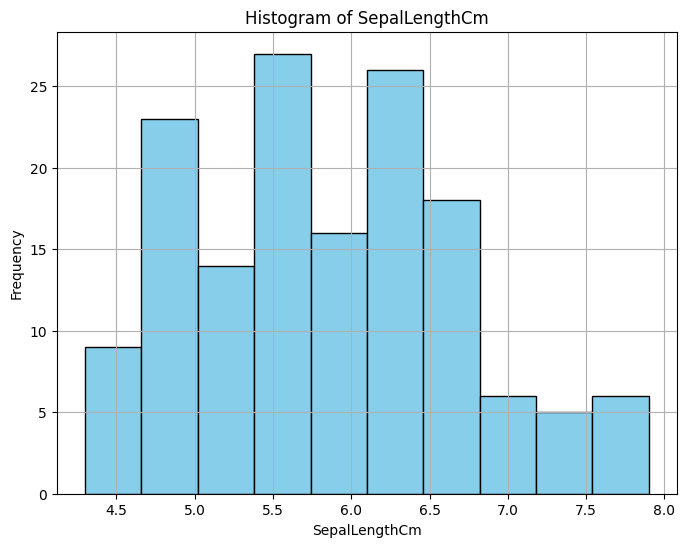

In [9]:
# Statistical Analysis Plots
def plot_histogram(data, column):
    """Plot a histogram for a given column."""
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

plot_histogram(data, 'SepalLengthCm')

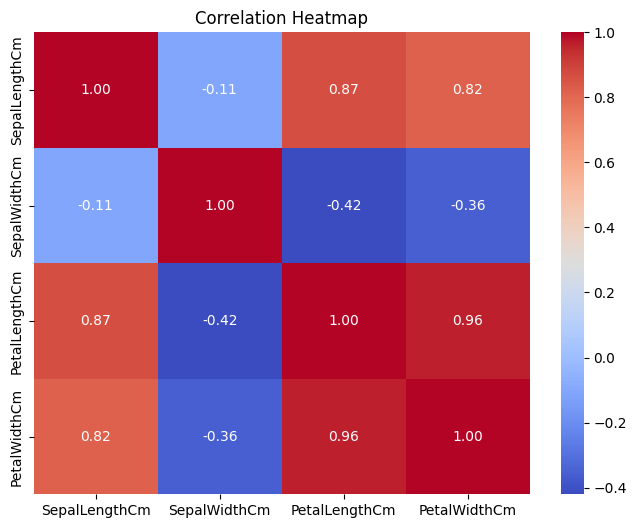

In [10]:
# Correlation Heatmap
def plot_correlation_heatmap(data, columns):
    """Plot a heatmap of correlations for given columns."""
    correlation_matrix = data[columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(data, numeric_features)

In [11]:
# Statistical Summary
def statistical_summary(data, columns):
    """Print basic statistical moments for given columns."""
    summary = data[columns].describe().T
    summary['Skewness'] = data[columns].skew()
    summary['Kurtosis'] = data[columns].kurt()
    print("\nStatistical Summary:")
    print(summary)

statistical_summary(data, numeric_features)


Statistical Summary:
               count      mean       std  min  25%   50%  75%  max  Skewness  \
SepalLengthCm  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9  0.314911   
SepalWidthCm   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4  0.334053   
PetalLengthCm  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9 -0.274464   
PetalWidthCm   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5 -0.104997   

               Kurtosis  
SepalLengthCm -0.552064  
SepalWidthCm   0.290781  
PetalLengthCm -1.401921  
PetalWidthCm  -1.339754  
